Gjennomsnittsnedbøren er: 2.65 mm
Median nedbøren er: 0.2 mm
Standardavviket til nedbøren er: 6 mm
Gjennomsnittstemperaturen er: 6.25 °C
Median temperaturen er: 5.9 °C
Standardavviket til temperaturen er: 7 °C


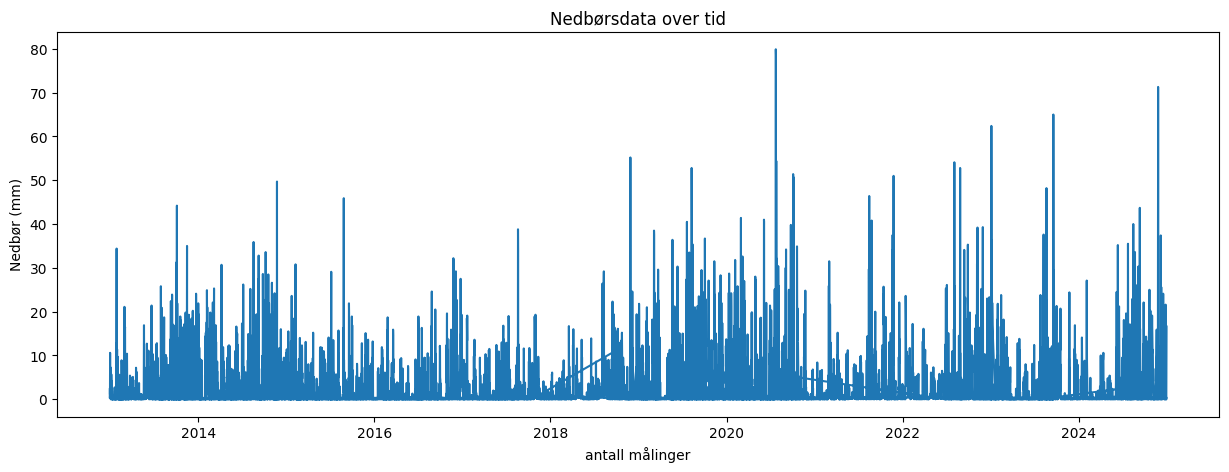

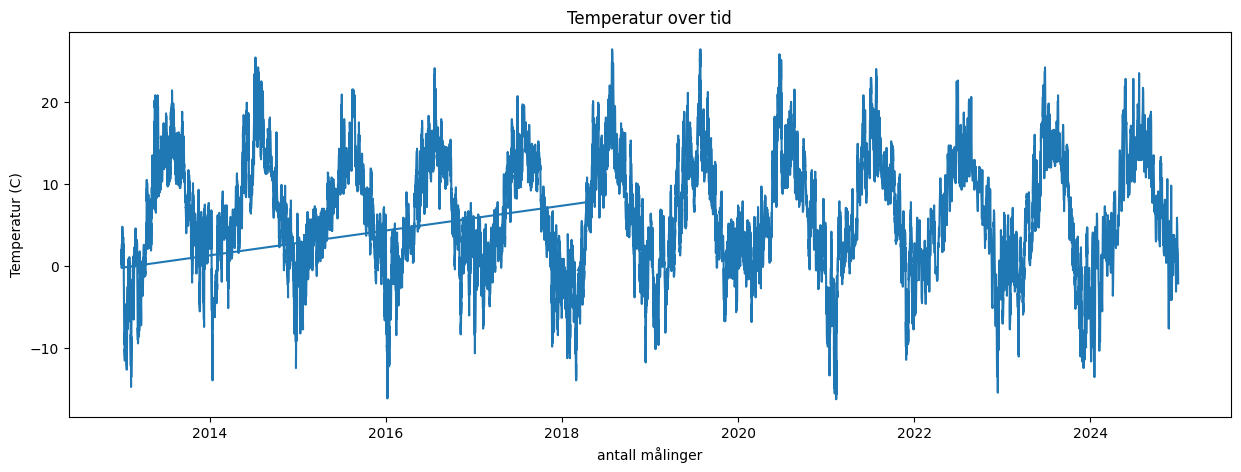

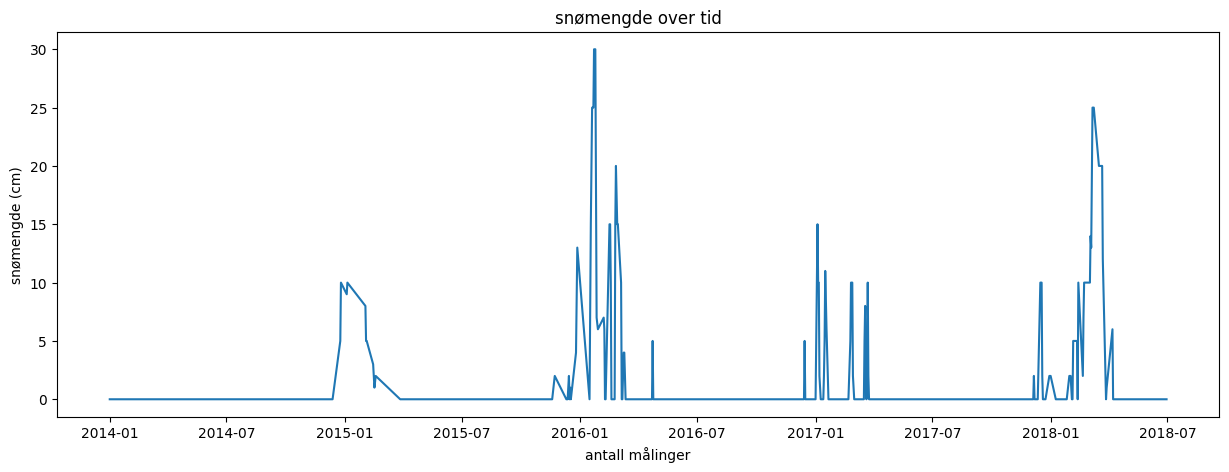

Gjennomsnittssnømengden er: 0.76 cm
Median snømengden er: 0.0 cm
Standardavviket til snømengden er: 3 cm


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = "https://github.com/PetterOttersen/milj-dataanalyse/raw/refs/heads/main/Excelfil.xlsx"

#Leser data fra den rensa excel filen
data = pd.read_excel(file_path, engine="openpyxl")
    

#Konverterer tiden
data["referenceTime"]=pd.to_datetime(data["referenceTime"])
data["timeOffset"]=pd.to_timedelta(data["timeOffset"])
data["justertTid"]=data["referenceTime"]-data["timeOffset"]

#Filtrer temperatur, nedbør og snømengder

temp_data=data[data["elementId"]=="mean(air_temperature P1D)"]
nedbør_data=data[data["elementId"]=="sum(precipitation_amount P1D)"]
snømengder_data=data[data["elementId"]=="surface_snow_thickness"]


#Henter ut verdiene

temperatur=temp_data["value"].values
temp_tider=temp_data["justertTid"].values

nedbør=nedbør_data["value"].values
nedbør_tider=nedbør_data["justertTid"].values

snømengder=snømengder_data["value"].values
snømengder_tider=snømengder_data["justertTid"].values



         
#Nedbør
gjennomsnitts_nedbør=np.mean(nedbør)
median_nedbør=np.median(nedbør)
standardavvik_nedbør=np.std(nedbør)

#Temperatur
gjennomsnitts_temp=np.mean(temperatur)
median_temp=np.median(temperatur)
standardavvik_temp=np.std(temperatur)

#Snø
gjennomsnitts_snø=np.mean(snømengder)
median_snø=np.median(snømengder)
standardavvik_snø=np.std(snømengder)

#ploter figurene
plt.figure(figsize=(15,5))
plt.plot(nedbør_tider,nedbør)  
plt.title("Nedbørsdata over tid")
plt.xlabel("antall målinger")
plt.ylabel("Nedbør (mm)")



print("Gjennomsnittsnedbøren er:",round(gjennomsnitts_nedbør,2),"mm")
print("Median nedbøren er:",round(median_nedbør,2),"mm")
print("Standardavviket til nedbøren er:",round(standardavvik_nedbør),"mm")



plt.figure(figsize=(15,5))
plt.plot(temp_tider,temperatur) 
plt.title("Temperatur over tid")
plt.xlabel("antall målinger")
plt.ylabel("Temperatur (C)")



print("Gjennomsnittstemperaturen er:",round(gjennomsnitts_temp,2),"°C")
print("Median temperaturen er:",round(median_temp,2),"°C")
print("Standardavviket til temperaturen er:",round(standardavvik_temp),"°C")



plt.figure(figsize=(15,5))
plt.plot(snømengder_tider,snømengder)
plt.title("snømengde over tid")
plt.xlabel("antall målinger")
plt.ylabel("snømengde (cm)")

plt.show()

print("Gjennomsnittssnømengden er:",round(gjennomsnitts_snø,2),"cm")
print("Median snømengden er:",round(median_snø,2),"cm")
print("Standardavviket til snømengden er:",round(standardavvik_snø),"cm")

